# Day 08. Exercise 05
# Clustering

## 0. Imports

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [85]:
df_initial = pd.read_csv('../data/regression.csv')

print(f"Размер данных: {df_initial.shape}")
print(f"\nПропущенные значения:\n{df_initial.isnull().sum()}")
df_initial.head()

Размер данных: (29, 4)

Пропущенные значения:
uid            0
num_commits    0
pageviews      0
AVG(diff)      0
dtype: int64


,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


In [86]:
# Сохраняем uid для анализа результатов
user_ids = df_initial['uid'].copy()

# Удаляем pageviews, оставляем только commits и avg_diff
df = df_initial.drop(['pageviews', 'uid'], axis=1).copy()
print(f"\nДанные после удаления pageviews:")
df.head()



Данные после удаления pageviews:


,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667


In [87]:
print(f"\nРазмер: {df.shape}")
print(f"\nОписательная статистика:")
print(df.describe())


Размер: (29, 2)

Описательная статистика:
       num_commits   AVG(diff)
count    29.000000   29.000000
mean     45.137931  -90.786782
std      31.661969   56.064638
min       5.000000 -223.600000
25%      20.000000 -137.200000
50%      41.000000  -89.000000
75%      61.000000  -52.333333
max     128.000000   -2.000000


In [88]:
# Сохраняем исходные данные для визуализации
X = df.values
feature_names = df.columns.tolist()
feature_names

['num_commits', 'AVG(diff)']

In [89]:
# Масштабирование данных (важно для кластеризации)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
print(f"\nДанные готовы для кластеризации:")
print(f"Признаки: {feature_names}")
print(f"Размер: {X_scaled.shape}")


Данные готовы для кластеризации:
Признаки: ['num_commits', 'AVG(diff)']
Размер: (29, 2)


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

KMeans базовая модель (n_clusters=3):
Количество точек в каждом кластере: [14  7  8]
Silhouette Score: 0.4048
n_clusters=2: Silhouette Score = 0.3710
n_clusters=3: Silhouette Score = 0.4048
n_clusters=4: Silhouette Score = 0.3612
n_clusters=5: Silhouette Score = 0.4830
n_clusters=6: Silhouette Score = 0.4954
n_clusters=7: Silhouette Score = 0.4675
n_clusters=8: Silhouette Score = 0.4344
n_clusters=9: Silhouette Score = 0.4376
Лучшее количество кластеров: 6 (Silhouette: 0.4954)


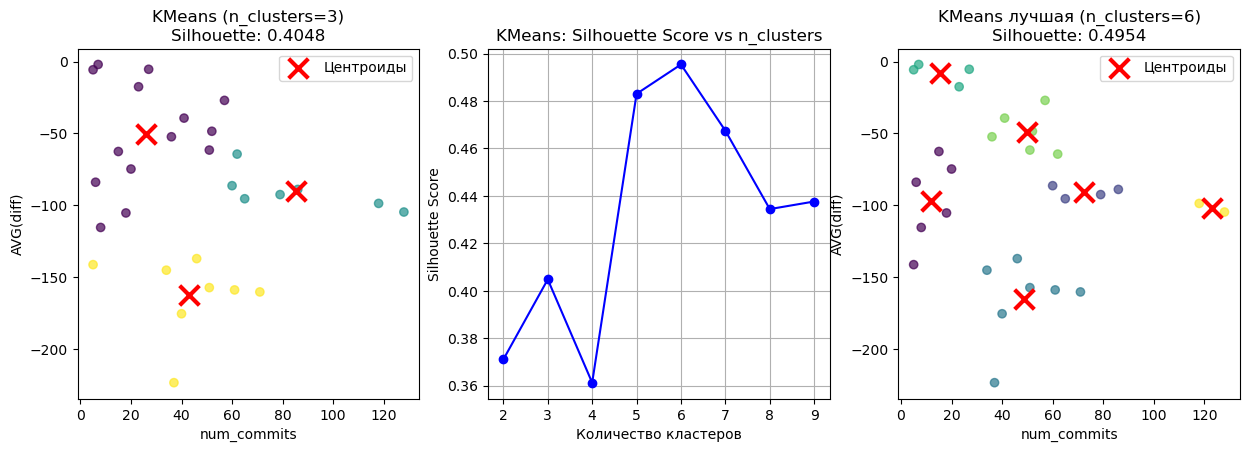

In [91]:
# Базовая модель
kmeans_base = KMeans(n_clusters=3, random_state=21) # , n_init=10
kmeans_labels = kmeans_base.fit_predict(X_scaled)

print(f"KMeans базовая модель (n_clusters=3):")
print(f"Количество точек в каждом кластере: {np.bincount(kmeans_labels)}")

# Silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {kmeans_silhouette:.4f}")

# Визуализация базовой модели
plt.figure(figsize=(15, 10))

# Subplot: Базовая модель
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.scatter(scaler.inverse_transform(kmeans_base.cluster_centers_)[:, 0], 
           scaler.inverse_transform(kmeans_base.cluster_centers_)[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Центроиды')
plt.title(f'KMeans (n_clusters=3)\nSilhouette: {kmeans_silhouette:.4f}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()

# Пробуем разные n_clusters
n_clusters_range = [2, 3, 4, 5, 6, 7, 8, 9]
kmeans_scores = []
kmeans_results = {}

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=21) 
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    kmeans_scores.append(score)
    kmeans_results[n_clusters] = (labels, score, kmeans.cluster_centers_)
    print(f"n_clusters={n_clusters}: Silhouette Score = {score:.4f}")

# Находим лучшее количество кластеров
best_k = n_clusters_range[np.argmax(kmeans_scores)]
print(f"Лучшее количество кластеров: {best_k} (Silhouette: {max(kmeans_scores):.4f})")

# Subplot: График silhouette scores
plt.subplot(2, 3, 2)
plt.plot(n_clusters_range, kmeans_scores, 'bo-')
plt.title('KMeans: Silhouette Score vs n_clusters')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Subplot: Лучшая модель
best_labels, best_score, best_centers = kmeans_results[best_k]
plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
plt.scatter(scaler.inverse_transform(best_centers)[:, 0], 
           scaler.inverse_transform(best_centers)[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Центроиды')
plt.title(f'KMeans лучшая (n_clusters={best_k})\nSilhouette: {best_score:.4f}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

DBSCAN базовая модель (eps=20, min_samples=2):
Найдено кластеров: 9
Шум (outliers): 4 точек
Распределение по кластерам: [5 3 3 2 2 4 2 2 2]
Silhouette Score: 0.5442

Подбор eps (при min_samples=2):
eps=18: 9 кластеров, 4 шум, silhouette=0.5442
eps=19: 9 кластеров, 4 шум, silhouette=0.5442
eps=20: 9 кластеров, 4 шум, silhouette=0.5442
eps=21: 7 кластеров, 3 шум, silhouette=0.5598
eps=22: 7 кластеров, 2 шум, silhouette=0.5547
eps=23: 6 кластеров, 2 шум, silhouette=0.4573
eps=24: 5 кластеров, 2 шум, silhouette=0.4033
eps=25: 4 кластеров, 2 шум, silhouette=0.4216
eps=26: 4 кластеров, 2 шум, silhouette=0.4216
Лучший eps: 21 (silhouette: 0.5598)

Подбор min_samples (при eps=21):
min_samples=1: 10 кластеров, 0 шум, silhouette=0.4361
min_samples=2: 7 кластеров, 3 шум, silhouette=0.5598
min_samples=3: 5 кластеров, 7 шум, silhouette=0.5811
min_samples=4: 3 кластеров, 14 шум, silhouette=0.5947
min_samples=5: 2 кластеров, 19 шум, silhouette=0.7878
Лучший min_samples: 5 (silhouette: 0.7878)

Финаль

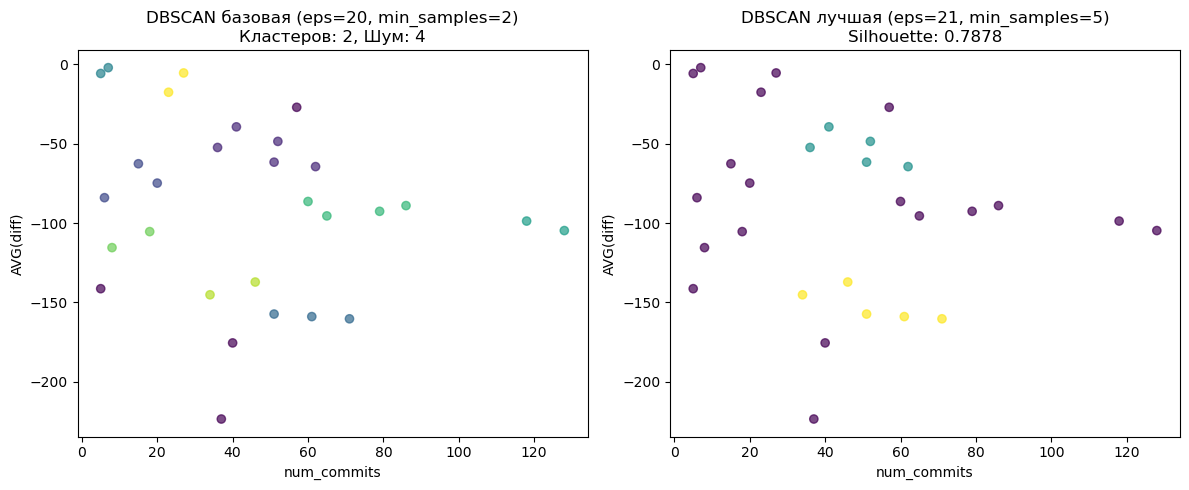

In [92]:
# Базовая модель
dbscan_base = DBSCAN(eps=20, min_samples=2)
dbscan_labels = dbscan_base.fit_predict(X)  # Исходные данные!

print(f"DBSCAN базовая модель (eps=20, min_samples=2):")
unique_labels = np.unique(dbscan_labels)
print(f"Найдено кластеров: {len(unique_labels[unique_labels != -1])}")
print(f"Шум (outliers): {np.sum(dbscan_labels == -1)} точек")
print(f"Распределение по кластерам: {np.bincount(dbscan_labels[dbscan_labels != -1])}")

mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
print(f"Silhouette Score: {dbscan_silhouette:.4f}")

# Пробуем разные eps при фиксированном min_samples=2
eps_values = [18, 19, 20, 21, 22, 23, 24, 25, 26]
fixed_min_samples = 2

print(f"\nПодбор eps (при min_samples={fixed_min_samples}):")
best_eps = None
best_eps_score = -1

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=fixed_min_samples)
    labels = dbscan.fit_predict(X)
    
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels[unique_labels != -1])
    n_noise = np.sum(labels == -1)
    
    if n_clusters > 1:
        mask = labels != -1
        if np.sum(mask) > 1:
            score = silhouette_score(X[mask], labels[mask])
            print(f"eps={eps}: {n_clusters} кластеров, {n_noise} шум, silhouette={score:.4f}")
            
            if score > best_eps_score:
                best_eps_score = score
                best_eps = eps
        else:
            print(f"eps={eps}: {n_clusters} кластеров, {n_noise} шум, мало точек")
    else:
        print(f"eps={eps}: {n_clusters} кластеров, {n_noise} шум")

print(f"Лучший eps: {best_eps} (silhouette: {best_eps_score:.4f})")

# Теперь пробуем разные min_samples при лучшем eps
min_samples_values = [1, 2, 3, 4, 5]
best_min_samples = None
best_min_samples_score = -1

if best_eps:
    print(f"\nПодбор min_samples (при eps={best_eps}):")
    
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels[unique_labels != -1])
        n_noise = np.sum(labels == -1)
        
        if n_clusters > 1:
            mask = labels != -1
            if np.sum(mask) > 1:
                score = silhouette_score(X[mask], labels[mask])
                print(f"min_samples={min_samples}: {n_clusters} кластеров, {n_noise} шум, silhouette={score:.4f}")
                
                if score > best_min_samples_score:
                    best_min_samples_score = score
                    best_min_samples = min_samples
            else:
                print(f"min_samples={min_samples}: {n_clusters} кластеров, {n_noise} шум, мало точек")
        else:
            print(f"min_samples={min_samples}: {n_clusters} кластеров, {n_noise} шум")
    
    print(f"Лучший min_samples: {best_min_samples} (silhouette: {best_min_samples_score:.4f})")
    
    # Финальная модель с лучшими параметрами
    best_dbscan_params = (best_eps, best_min_samples)
    best_dbscan_score = best_min_samples_score
    
    final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    best_dbscan_labels = final_dbscan.fit_predict(X)
    
    print(f"\nФинальная DBSCAN: eps={best_eps}, min_samples={best_min_samples}")
    print(f"Silhouette Score: {best_dbscan_score:.4f}")
else:
    print("Не удалось найти подходящий eps")
    best_dbscan_params = None
    best_dbscan_score = -1
    best_dbscan_labels = None

# Визуализация DBSCAN
plt.figure(figsize=(12, 5))

# Subplot 1: Базовая DBSCAN
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title(f'DBSCAN базовая (eps=20, min_samples=2)\nКластеров: {len(unique_labels[unique_labels != -1])}, Шум: {np.sum(dbscan_labels == -1)}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Subplot 2: Лучшая DBSCAN
if best_dbscan_params and best_dbscan_labels is not None:
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=best_dbscan_labels, cmap='viridis', alpha=0.7)
    n_clusters_best = len(np.unique(best_dbscan_labels[best_dbscan_labels != -1]))
    n_noise_best = np.sum(best_dbscan_labels == -1)
    plt.title(f'DBSCAN лучшая (eps={best_dbscan_params[0]}, min_samples={best_dbscan_params[1]})\nSilhouette: {best_dbscan_score:.4f}')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
else:
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, 'DBSCAN: не найдены\nподходящие параметры', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('DBSCAN - параметры не найдены')

plt.tight_layout()
plt.show()


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

AgglomerativeClustering базовая модель (n_clusters=5):
Количество точек в каждом кластере: [10  6  7  2  4]
Silhouette Score: 0.4944
n_clusters=2: Silhouette Score = 0.2964
n_clusters=3: Silhouette Score = 0.3707
n_clusters=4: Silhouette Score = 0.4210
n_clusters=5: Silhouette Score = 0.4944
n_clusters=6: Silhouette Score = 0.4954
n_clusters=7: Silhouette Score = 0.4815
n_clusters=8: Silhouette Score = 0.4633
Лучшее количество кластеров: 6 (Silhouette: 0.4954)


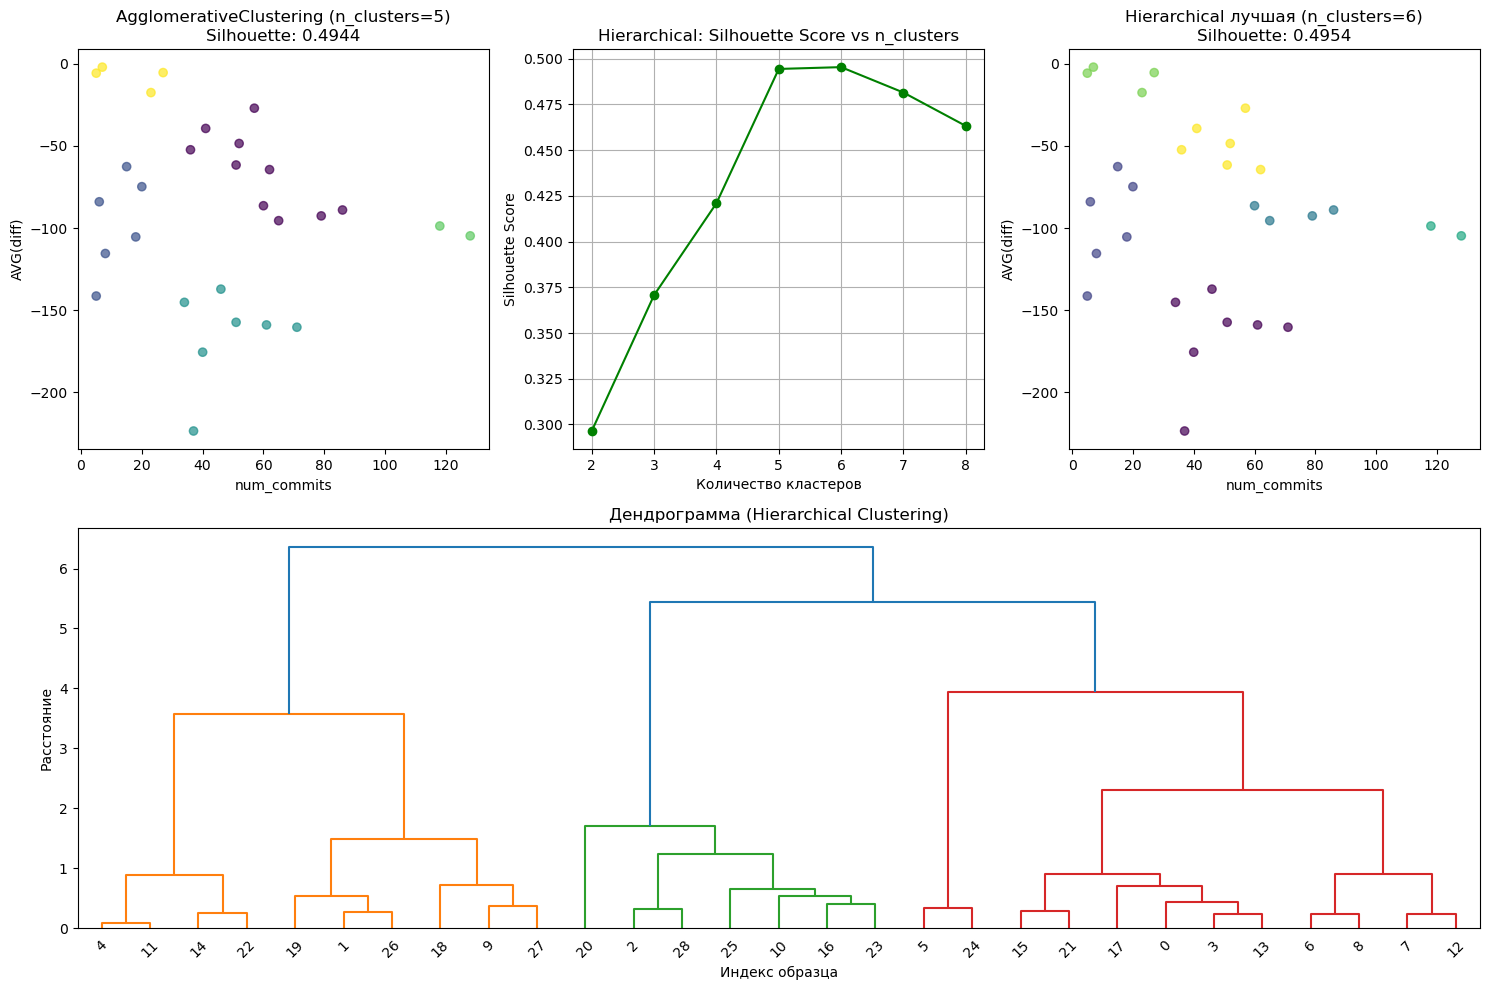

In [93]:
# Базовая модель
agg_base = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_base.fit_predict(X_scaled)

print(f"AgglomerativeClustering базовая модель (n_clusters=5):")
print(f"Количество точек в каждом кластере: {np.bincount(agg_labels)}")

# Silhouette score
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score: {agg_silhouette:.4f}")

# Пробуем разные n_clusters
n_clusters_agg = [2, 3, 4, 5, 6, 7, 8]
agg_scores = []
agg_results = {}

for n_clusters in n_clusters_agg:
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    agg_scores.append(score)
    agg_results[n_clusters] = (labels, score)
    print(f"n_clusters={n_clusters}: Silhouette Score = {score:.4f}")

best_agg_k = n_clusters_agg[np.argmax(agg_scores)]
print(f"Лучшее количество кластеров: {best_agg_k} (Silhouette: {max(agg_scores):.4f})")

# Визуализация
plt.figure(figsize=(15, 10))

# Subplot 1: Базовая модель
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', alpha=0.7)
plt.title(f'AgglomerativeClustering (n_clusters=5)\nSilhouette: {agg_silhouette:.4f}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Subplot 2: График silhouette scores
plt.subplot(2, 3, 2)
plt.plot(n_clusters_agg, agg_scores, 'go-')
plt.title('Hierarchical: Silhouette Score vs n_clusters')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Subplot 3: Лучшая модель
best_agg_labels, best_agg_score = agg_results[best_agg_k]
plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=best_agg_labels, cmap='viridis', alpha=0.7)
plt.title(f'Hierarchical лучшая (n_clusters={best_agg_k})\nSilhouette: {best_agg_score:.4f}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Дендрограмма
plt.subplot(2, 1, 2)
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Дендрограмма (Hierarchical Clustering)')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')

plt.tight_layout()
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [94]:
def optimize_clustering2(model_class, base_params, param_name, param_range, X_data, title_prefix=""):
    """
    Функция для оптимизации параметров кластеризации
    
    Args:
        model_class: класс модели кластеризации (например, KMeans)
        base_params: базовые параметры модели (dict)
        param_name: название параметра для оптимизации (str)
        param_range: диапазон значений параметра (list)
        X_data: данные для кластеризации
        title_prefix: префикс для заголовков графиков
    
    Returns:
        best_value: лучшее значение параметра
        best_score: лучший silhouette score
        best_labels: метки кластеров для лучшей модели
    """
    scores = []
    all_results = {}
    
    print(f"Оптимизация параметра '{param_name}' для {model_class.__name__}:")
    
    for param_value in param_range:
        # Создаем копию базовых параметров и обновляем оптимизируемый параметр
        current_params = base_params.copy()
        current_params[param_name] = param_value
        
        try:
            # Создаем и обучаем модель
            model = model_class(**current_params)
            labels = model.fit_predict(X_data)
            
            # Проверяем, что есть больше одного кластера
            unique_labels = np.unique(labels)
            
            if model_class == DBSCAN:
                # Для DBSCAN исключаем шум
                mask = labels != -1
                if len(unique_labels[unique_labels != -1]) > 1 and np.sum(mask) > 1:
                    score = silhouette_score(X_data[mask], labels[mask])
                    n_clusters = len(unique_labels[unique_labels != -1])
                    n_noise = np.sum(labels == -1)
                    print(f"{param_name}={param_value}: {n_clusters} кластеров, {n_noise} шум, silhouette={score:.4f}")
                else:
                    score = -1
                    print(f"{param_name}={param_value}: недостаточно кластеров или точек")
            else:
                # Для KMeans и AgglomerativeClustering
                if len(unique_labels) > 1:
                    score = silhouette_score(X_data, labels)
                    print(f"{param_name}={param_value}: silhouette={score:.4f}")
                else:
                    score = -1
                    print(f"{param_name}={param_value}: только один кластер")
            
            scores.append(score)
            all_results[param_value] = (labels, score)
            
        except Exception as e:
            print(f"{param_name}={param_value}: ошибка - {e}")
            scores.append(-1)
            all_results[param_value] = (None, -1)
    
    # Находим лучший параметр
    valid_scores = [s for s in scores if s > -1]
    if valid_scores:
        best_idx = np.argmax(scores)
        best_value = param_range[best_idx]
        best_score = scores[best_idx]
        best_labels = all_results[best_value][0]
        
        print(f"Лучший {param_name}: {best_value} (Silhouette: {best_score:.4f})")
    else:
        print("Не удалось найти валидные результаты")
        return None, -1, None
    
    # Создаем визуализацию
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Silhouette Score vs параметр
    valid_indices = [i for i, s in enumerate(scores) if s > -1]
    if valid_indices:
        valid_params = [param_range[i] for i in valid_indices]
        valid_scores = [scores[i] for i in valid_indices]
        
        ax1.plot(valid_params, valid_scores, 'bo-')
        ax1.axvline(x=best_value, color='red', linestyle='--', label=f'Лучший: {best_value}')
        ax1.set_xlabel(param_name)
        ax1.set_ylabel('Silhouette Score')
        ax1.set_title(f'{title_prefix}Silhouette Score vs {param_name}')
        ax1.grid(True)
        ax1.legend()
    
    # График 2: Scatter plot с лучшими параметрами
    if best_labels is not None:
        scatter = ax2.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
        ax2.set_xlabel(feature_names[0])
        ax2.set_ylabel(feature_names[1])
        ax2.set_title(f'{title_prefix}Лучшая модель ({param_name}={best_value})\nSilhouette: {best_score:.4f}')
        plt.colorbar(scatter, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    return best_value, best_score, best_labels

In [95]:
def optimize_clustering(model_class, base_params, param_name, param_range, X_data, title_prefix=""):
    """
    Функция для оптимизации параметров кластеризации
    
    Args:
        model_class: класс модели кластеризации (например, KMeans)
        base_params: базовые параметры модели (dict)
        param_name: название параметра для оптимизации (str)
        param_range: диапазон значений параметра (list)
        X_data: данные для кластеризации
        title_prefix: префикс для заголовков графиков
    
    Returns:
        best_value: лучшее значение параметра
        best_score: лучший silhouette score
        best_labels: метки кластеров для лучшей модели
    """
    scores = []
    all_results = {}
    
    print(f"Оптимизация параметра '{param_name}' для {model_class.__name__}:")
    
    for param_value in param_range:
        # Создаем копию базовых параметров и обновляем оптимизируемый параметр
        current_params = base_params.copy()
        current_params[param_name] = param_value
        
        try:
            # Создаем и обучаем модель
            model = model_class(**current_params)
            labels = model.fit_predict(X_data)
            
            # Проверяем, что есть больше одного кластера
            unique_labels = np.unique(labels)
            
            if model_class == DBSCAN:
                # Для DBSCAN исключаем шум
                mask = labels != -1
                if len(unique_labels[unique_labels != -1]) > 1 and np.sum(mask) > 1:
                    score = silhouette_score(X_data[mask], labels[mask])
                    n_clusters = len(unique_labels[unique_labels != -1])
                    n_noise = np.sum(labels == -1)
                    print(f"{param_name}={param_value}: {n_clusters} кластеров, {n_noise} шум, silhouette={score:.4f}")
                else:
                    score = -1
                    print(f"{param_name}={param_value}: недостаточно кластеров или точек")
            else:
                # Для KMeans и AgglomerativeClustering
                if len(unique_labels) > 1:
                    score = silhouette_score(X_data, labels)
                    print(f"{param_name}={param_value}: silhouette={score:.4f}")
                else:
                    score = -1
                    print(f"{param_name}={param_value}: только один кластер")
            
            scores.append(score)
            all_results[param_value] = (labels, score)
            
        except Exception as e:
            print(f"{param_name}={param_value}: ошибка - {e}")
            scores.append(-1)
            all_results[param_value] = (None, -1)
    
    # Находим лучший параметр
    valid_scores = [s for s in scores if s > -1]
    if valid_scores:
        best_idx = np.argmax(scores)
        best_value = param_range[best_idx]
        best_score = scores[best_idx]
        best_labels = all_results[best_value][0]
        
        print(f"Лучший {param_name}: {best_value} (Silhouette: {best_score:.4f})")
    else:
        print("Не удалось найти валидные результаты")
        return None, -1, None
    
    # Создаем визуализацию
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График 1: Silhouette Score vs параметр
    valid_indices = [i for i, s in enumerate(scores) if s > -1]
    if valid_indices:
        valid_params = [param_range[i] for i in valid_indices]
        valid_scores = [scores[i] for i in valid_indices]
        
        ax1.plot(valid_params, valid_scores, 'bo-')
        ax1.axvline(x=best_value, color='red', linestyle='--', label=f'Лучший: {best_value}')
        ax1.set_xlabel(param_name)
        ax1.set_ylabel('Silhouette Score')
        ax1.set_title(f'{title_prefix}Silhouette Score vs {param_name}')
        ax1.grid(True)
        ax1.legend()
    
    # График 2: Scatter plot с лучшими параметрами
    if best_labels is not None:
        scatter = ax2.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
        ax2.set_xlabel(feature_names[0])
        ax2.set_ylabel(feature_names[1])
        ax2.set_title(f'{title_prefix}Лучшая модель ({param_name}={best_value})\nSilhouette: {best_score:.4f}')
        plt.colorbar(scatter, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    return best_value, best_score, best_labels


--- Оптимизация KMeans ---
Оптимизация параметра 'n_clusters' для KMeans:
n_clusters=2: silhouette=0.3773
n_clusters=3: silhouette=0.4037
n_clusters=4: silhouette=0.4172
n_clusters=5: silhouette=0.4830
n_clusters=6: silhouette=0.4918
n_clusters=7: silhouette=0.4769
n_clusters=8: silhouette=0.4610
Лучший n_clusters: 6 (Silhouette: 0.4918)


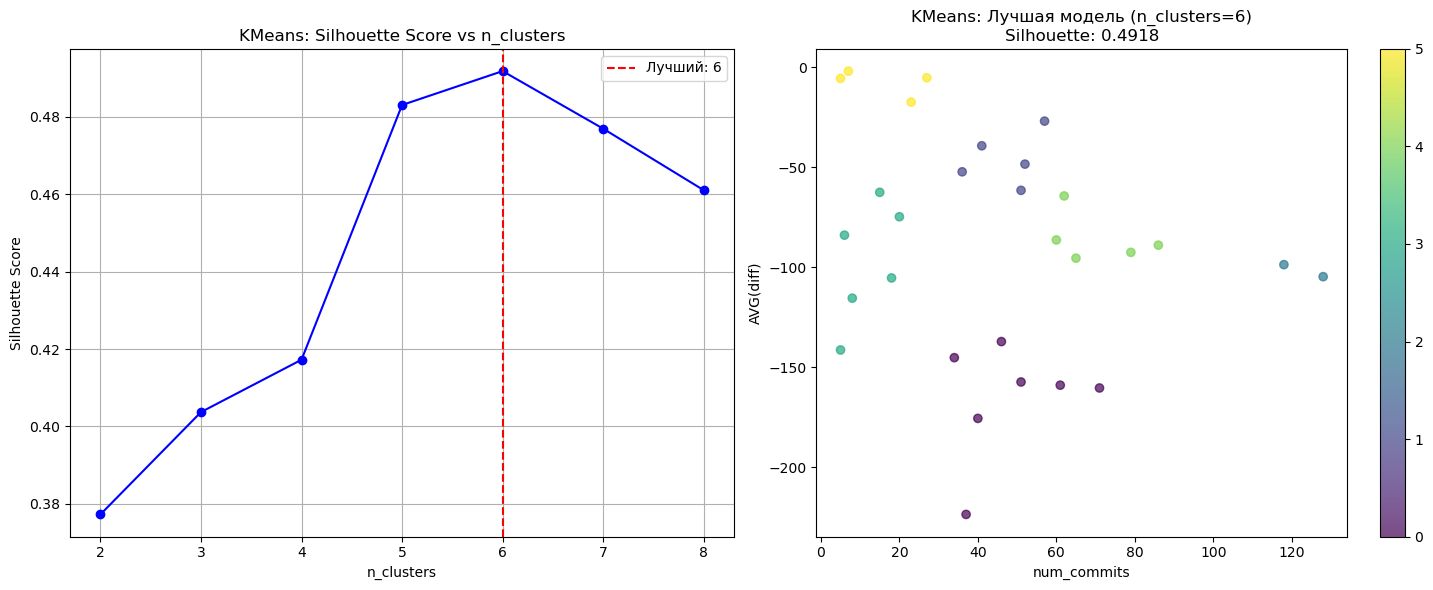


--- Оптимизация DBSCAN (eps) ---
Оптимизация параметра 'eps' для DBSCAN:
eps=0.3: 22 кластеров, 0 шум, silhouette=0.2631
eps=0.5: 8 кластеров, 0 шум, silhouette=0.4211
eps=0.7: 5 кластеров, 0 шум, silhouette=0.2883
eps=1.0: 2 кластеров, 0 шум, silhouette=0.4098
eps=1.2: недостаточно кластеров или точек
eps=1.5: недостаточно кластеров или точек
eps=2.0: недостаточно кластеров или точек
eps=2.5: недостаточно кластеров или точек
Лучший eps: 0.5 (Silhouette: 0.4211)


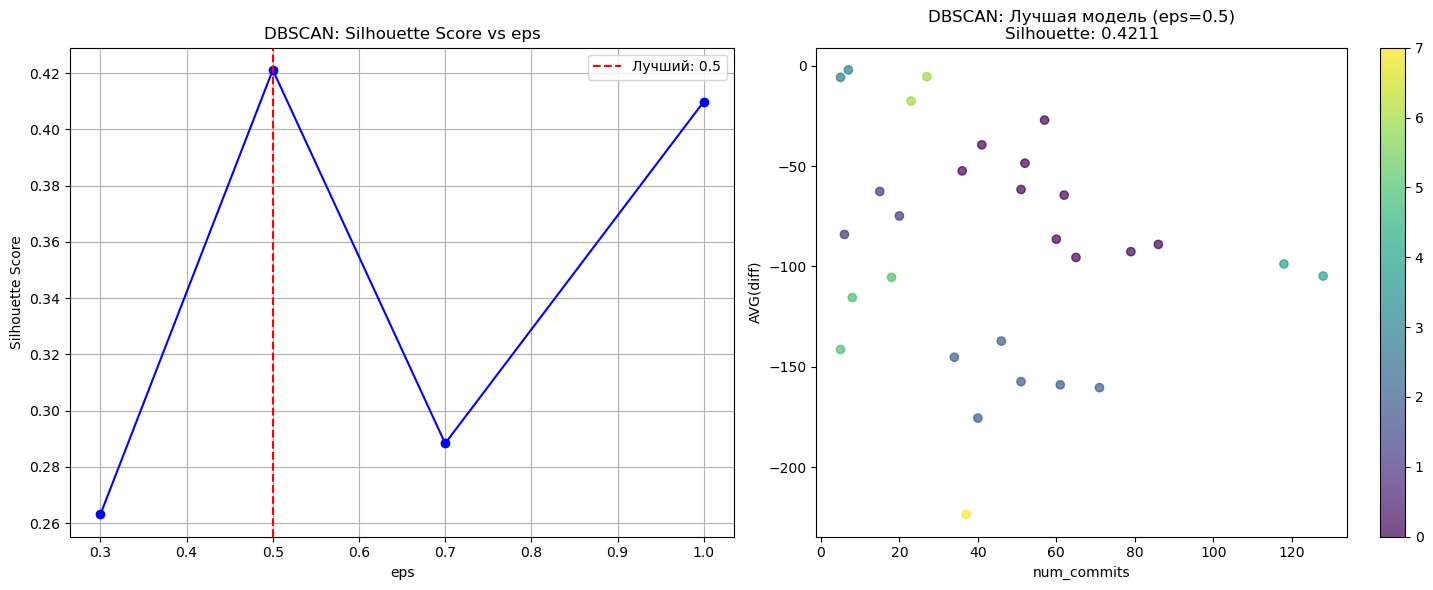


--- Оптимизация AgglomerativeClustering ---
Оптимизация параметра 'n_clusters' для AgglomerativeClustering:
n_clusters=2: silhouette=0.2964
n_clusters=3: silhouette=0.3707
n_clusters=4: silhouette=0.4210
n_clusters=5: silhouette=0.4944
n_clusters=6: silhouette=0.4954
n_clusters=7: silhouette=0.4815
n_clusters=8: silhouette=0.4633
Лучший n_clusters: 6 (Silhouette: 0.4954)


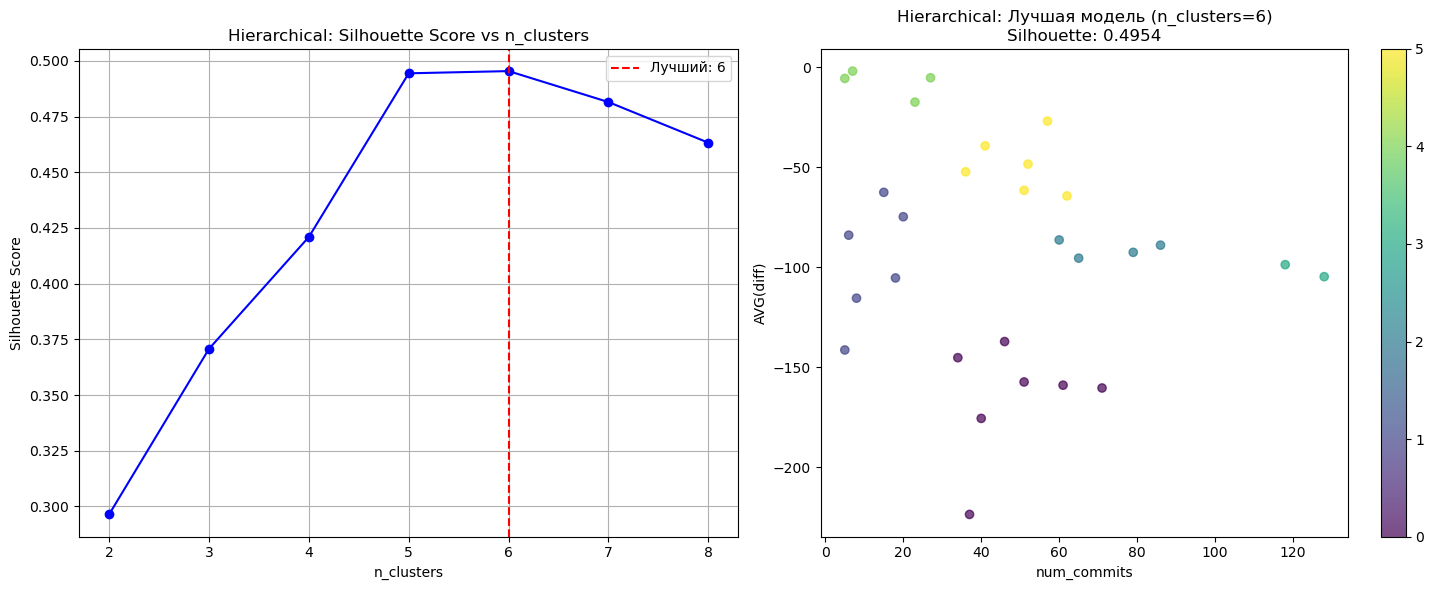

In [96]:
# 1. KMeans - оптимизация n_clusters
print("\n--- Оптимизация KMeans ---")
kmeans_best_k, kmeans_best_score, kmeans_best_labels = optimize_clustering(
    KMeans, 
    {'random_state': 21, 'n_init': 10}, 
    'n_clusters', 
    [2, 3, 4, 5, 6, 7, 8],
    X_scaled,
    "KMeans: "
)

# 2. DBSCAN - оптимизация eps
print("\n--- Оптимизация DBSCAN (eps) ---")
dbscan_best_eps, dbscan_best_score_eps, dbscan_best_labels_eps = optimize_clustering(
    DBSCAN, 
    {'min_samples': 1}, 
    'eps', 
    [0.3, 0.5, 0.7, 1.0, 1.2, 1.5, 2.0, 2.5],
    X_scaled,  # Используем масштабированные данные
    "DBSCAN: "
)

# 3. AgglomerativeClustering - оптимизация n_clusters
print("\n--- Оптимизация AgglomerativeClustering ---")
agg_best_k, agg_best_score_opt, agg_best_labels_opt = optimize_clustering(
    AgglomerativeClustering, 
    {}, 
    'n_clusters', 
    [2, 3, 4, 5, 6, 7, 8],
    X_scaled,
    "Hierarchical: "
)


--- Оптимизация KMeans ---
Оптимизация параметра 'n_clusters' для KMeans:
n_clusters=2: silhouette=0.3773
n_clusters=3: silhouette=0.4037
n_clusters=4: silhouette=0.4172
n_clusters=5: silhouette=0.4830
n_clusters=6: silhouette=0.4918
n_clusters=7: silhouette=0.4769
n_clusters=8: silhouette=0.4610
Лучший n_clusters: 6 (Silhouette: 0.4918)


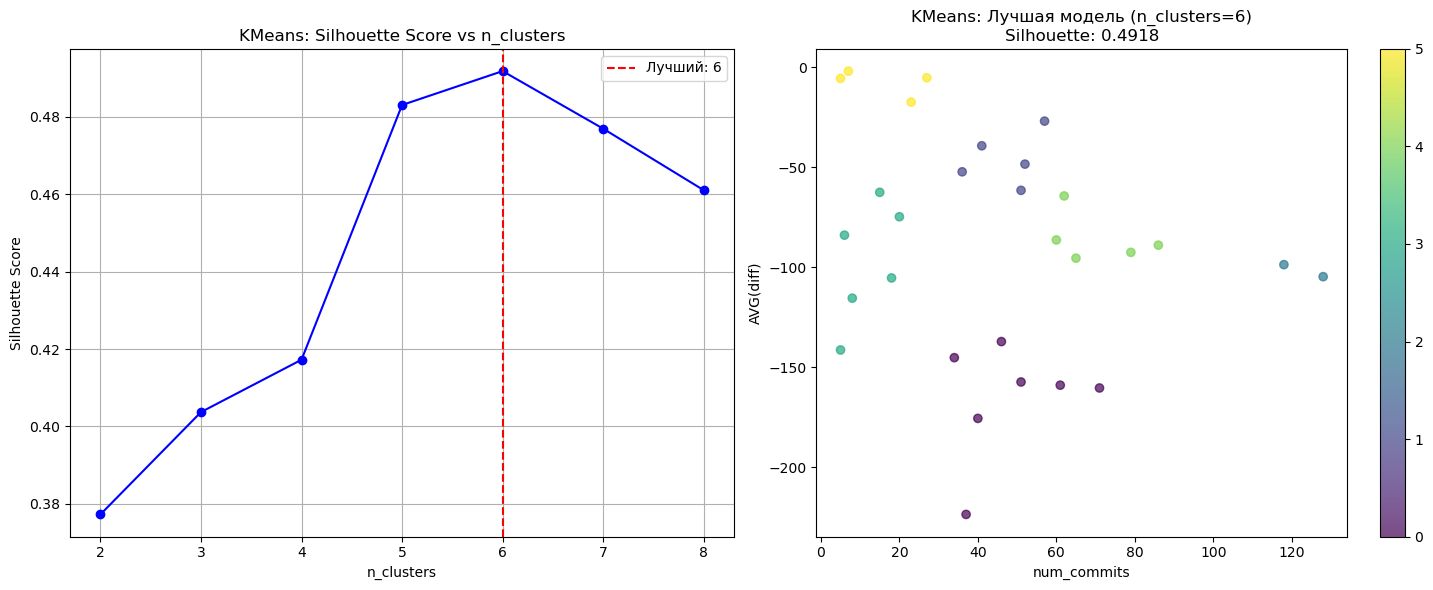


--- Оптимизация DBSCAN (eps) ---
Оптимизация параметра 'eps' для DBSCAN:
eps=18: 13 кластеров, 0 шум, silhouette=0.4322
eps=19: 13 кластеров, 0 шум, silhouette=0.4322
eps=20: 13 кластеров, 0 шум, silhouette=0.4322
eps=21: 10 кластеров, 0 шум, silhouette=0.4361
eps=22: 9 кластеров, 0 шум, silhouette=0.4871
eps=23: 8 кластеров, 0 шум, silhouette=0.3953
eps=24: 7 кластеров, 0 шум, silhouette=0.3378
eps=25: 6 кластеров, 0 шум, silhouette=0.2997
eps=26: 6 кластеров, 0 шум, silhouette=0.2997
Лучший eps: 22 (Silhouette: 0.4871)


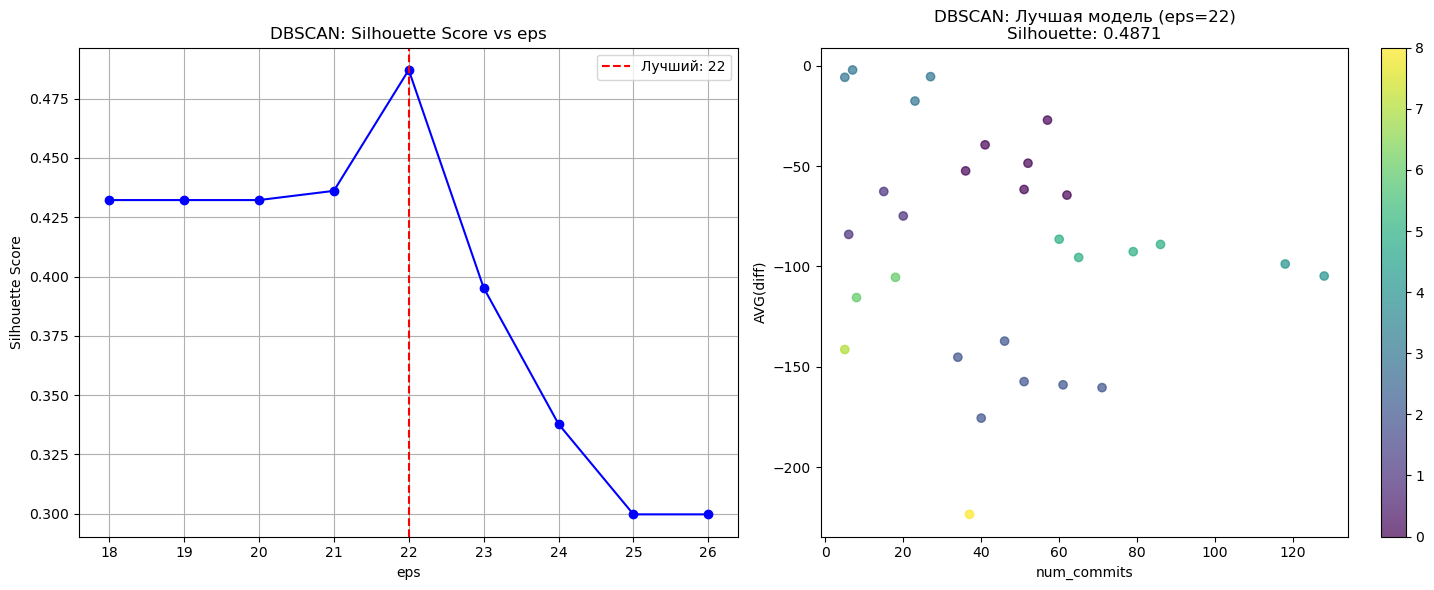


--- Оптимизация AgglomerativeClustering ---
Оптимизация параметра 'n_clusters' для AgglomerativeClustering:
n_clusters=2: silhouette=0.2964
n_clusters=3: silhouette=0.3707
n_clusters=4: silhouette=0.4210
n_clusters=5: silhouette=0.4944
n_clusters=6: silhouette=0.4954
n_clusters=7: silhouette=0.4815
n_clusters=8: silhouette=0.4633
Лучший n_clusters: 6 (Silhouette: 0.4954)


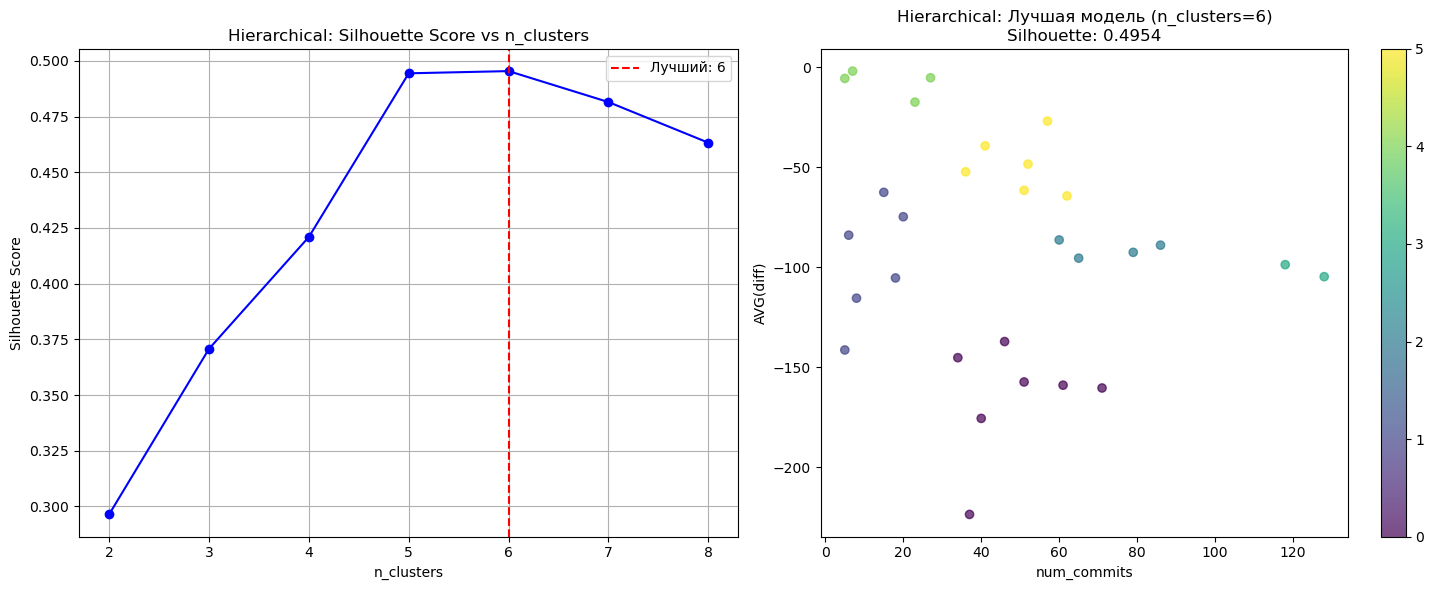

In [ ]:
print("\n--- Оптимизация KMeans ---")
kmeans_best_k, kmeans_best_score, kmeans_best_labels = optimize_clustering(
    KMeans, 
    {'random_state': 21, 'n_init': 10}, 
    'n_clusters', 
    [2, 3, 4, 5, 6, 7, 8],
    X_scaled,
    "KMeans: "
)

# 2. DBSCAN - оптимизация eps
print("\n--- Оптимизация DBSCAN (eps) ---")
dbscan_best_eps, dbscan_best_score_eps, dbscan_best_labels_eps = optimize_clustering(
    DBSCAN, 
    {'min_samples': 1}, 
    'eps', 
    [18, 19, 20, 21, 22, 23, 24, 25, 26],
    X,
    "DBSCAN: "
)

# 3. AgglomerativeClustering - оптимизация n_clusters
print("\n--- Оптимизация AgglomerativeClustering ---")
agg_best_k, agg_best_score_opt, agg_best_labels_opt = optimize_clustering(
    AgglomerativeClustering, 
    {}, 
    'n_clusters', 
    [2, 3, 4, 5, 6, 7, 8],
    X_scaled,
    "Hierarchical: "
)